The objective of this project is to perform pricing of vanilla options using the object-oriented approach.

### Methods applied

1. Pricing European call and put options using Black-Scholes-Merton model

### Steps followed

1. Setting up class and constructor
2. Defining the parameters: Stock price, Strike price, Interest rate, Dividend yield, Expiry, Volatility
3. Calculating d1 and d2
4. Implementing the closed form solution based on the Black-Scholes equation
5. Plotting the option prices against strike prices
6. Calculating the option greeks


In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.width', 320) 
pd.set_option('display.max_rows', 100) #maximum number of rows
pd.options.display.float_format = '{:,.2f}'.format #Disable scientific notation 
import scipy.stats as si
import matplotlib.pyplot as plt

The following are the Black-Scholes-Merton option pricing formulas:

$$Call price = S*\exp{(-q*t)}*N(d_1) - K*\exp{(-r*t)}*N(d_2)$$

$$Put price = K*\exp{(-r*t)}*N(-d_2) - S*\exp{(-q*t)}*N(-d_1)$$

## 1. Implementing the Object Oriented Programming Approach

In [2]:
class BSM_Model:
    def __init__(self, option_type, price, strike, interest_rate, expiry, volatility, dividend_yield=0):
        self.s = price # Underlying asset price
        self.k = strike # Option strike price
        self.r = interest_rate # Continuous risk fee rate
        self.q = dividend_yield # Dividend continuous rate
        self.T = expiry # time to expiry (year)
        self.sigma = volatility # Underlying volatility
        self.type = option_type # option type "p" represents put option while type "c" represents call option
        
    def N(self, d):
        return si.norm.cdf(d)
    
    def norm_phi_pdf(self, d):
        return norm.pdf(d)
    def d1(self):
        d1=(np.log(self.s/self.k)+(self.r-self.q+0.5*self.sigma**2)*self.T)/(self.sigma*np.sqrt(self.T))
        return d1
    
    def d2(self):
        d2 = (np.log(self.s / self.k) + (self.r - self.q - 0.5*self.sigma**2)*self.T) / (self.sigma *np.sqrt(self.T))
        return d2
    def BSM_price(self):
        d1=self.d1()
        d2 = d1-self.sigma*np.sqrt(self.T)
        if self.type == 'c':
            price =np.exp(-self.r*self.T)*(self.s*np.exp((self.r-self.q)*self.T)*self.N(d1) - self.k*self.N(d2))
            call_price = self.s*np.exp(-self.q*self.T)*self.N(d1)- self.k*np.exp(-self.r*self.T)*self.N(d2)
            return call_price
        elif self.type == 'p':
            put_price = self.k*np.exp(-self.r*self.T)*self.N(-d2) - self.s*np.exp(-self.q*self.T)*self.N(-d1)
            return put_price
        else:
            print ("option type can only be call or put")


### 1.1 Practical examples

### 1.1.1 Call Option

In [3]:
Example_1 = BSM_Model('c', 42, 40, 0.1, 0.5, 0.2)#S,K,r,T,v
Example_1.BSM_price()

4.759422392871532

In [4]:
Call_Example = BSM_Model('c', 42, 40, 0.1, 0.5, 0.2)#S,K,r,T,v
Call_Example.BSM_price()

4.759422392871532

### 1.1.2 Put Option

In [5]:
Put_Example = BSM_Model('p', 42, 40, 0.1, 0.5, 0.2)#S,K,r,T,v
Put_Example.BSM_price()

0.8085993729000922

## 1.2 Plotting the Option price curve Relative to Strikes

In [6]:
# An array of strike prices
np.linspace(30, 50, 10)

array([30.        , 32.22222222, 34.44444444, 36.66666667, 38.88888889,
       41.11111111, 43.33333333, 45.55555556, 47.77777778, 50.        ])

In [11]:
# Applying the strike prices in the BSM model
strikes = np.linspace(30, 50, 10)
price = 42; interest_rate = 0.1; expiry =0.5; volatility = 0.2
call_prices = BSM_Model('c', price,strikes , interest_rate, expiry, volatility).BSM_price()
put_prices = BSM_Model('p', price,strikes , interest_rate, expiry, volatility).BSM_price()

Text(0.5, 1.0, 'Call Option Price Curve Relative to Strikes')

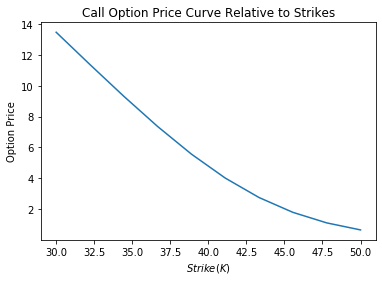

In [10]:
# plotting the call prices against strike prices
plt.plot(strikes, call_prices)
plt.xlabel("$Strike (K)$")
plt.ylabel("Option Price")
plt.title("Call Option Price Curve Relative to Strikes")

Text(0.5, 1.0, 'Put Option Price Curve Relative to Strikes')

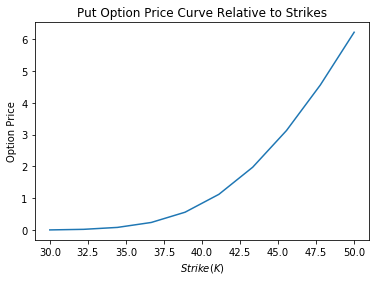

In [12]:
# plotting the call prices against strike prices
plt.plot(strikes, put_prices)
plt.xlabel("$Strike (K)$")
plt.ylabel("Option Price")
plt.title("Put Option Price Curve Relative to Strikes")

## 2. Option Greeks

#### Calculating d1 and d2:
$$d_1 = \frac{ln\frac{S}{K}+(r+\frac{\sigma^2}{2})*t}{\sigma\sqrt{t}}$$

$$d_2 = d_1 - \sigma\sqrt{t}$$

#### Calculating delta:

$$call delta = N(d_1)$$

$$Put delta = N(d_1)-1$$

#### Calculating gamma:
$$Gamma = \frac{\phi(d_1)}{S*v*\sqrt{(T-t)}}$$

#### Calculating vega:
$$Vega = S*\phi(d_1)*\sqrt{(T-t)}$$

#### Calculating theta:
$$Call Theta = \frac{-S*\phi(d_1)*v}{2*\sqrt{(T-t)}} - r*K*\exp({-r(T-t)})*N(d_2)$$

$$Put Theta = \frac{-S*\phi(d_1)*v}{2*\sqrt{(T-t)}} + r*K*\exp({-r(T-t)})*N(-d_2)$$

#### Calculating rho:
$$Call  rho = K*(T-t)*\exp({-r(T-t)})*N(d_2)$$

$$Put  rho = -K*(T-t)*\exp({-r(T-t)})*N(-d_2)$$

In [24]:
def norm_pdf_phi(x):
    return si.norm.pdf(x)

def N(z):
    return si.norm.cdf(z,0.0,1.0)

### 2.1 Call Option Greeks 

In [25]:
class call_option(object):
    def __init__(self,stock,strike,risk_free_int,expiry,volatility):
        self.S=stock
        self.K=strike
        self.T=expiry
        self.r=risk_free_int
        self.v=volatility
        
    def norm_phi_pdf(self, d):
        return norm.pdf(d)
    def N(self,d):
        return si.norm.pdf(d)
    def d1(self):
        d1=(np.log(self.S/self.K)+(self.r+0.5*self.v**2)*self.T)/(self.v*np.sqrt(self.T))
        return d1
    def delta(self):
        d1=self.d1()
        delta=N(d1)-1
        return delta
    def gamma(self):
        d1=self.d1()
        gamma=norm_pdf_phi(d1)/(self.S*self.v*np.sqrt(self.T))
        return gamma
    def theta(self):
        d1=self.d1()
        d2 = d1-self.v*np.sqrt(self.T)
        theta=(-((self.S*norm_pdf_phi(d1)*self.v)/(2.0*np.sqrt(self.T)))-(self.r*self.K*np.exp(-self.r*self.T)*N(d2)))
        return theta
    def vega(self):
        d1=self.d1()
        vega=(self.S*norm_pdf_phi(d1)*np.sqrt(self.T))/100.0
        return vega

In [26]:
Greek_Example_1 = call_option(42, 40, 0.1, 0.5, 0.2)#S,K,r,T,v
print(Greek_Example_1.delta())
print(Greek_Example_1.gamma())
print(Greek_Example_1.theta())
print(Greek_Example_1.vega())

0.779131290942669
0.04996267040591185
-4.559092194592627
0.08813415059602853


### 2.2 Put Option Greeks 

In [27]:
class put_option(object):
    def __init__(self,stock,strike,risk_free_int,expiry,volatility):
        self.S=stock
        self.K=strike
        self.T=expiry
        self.r=risk_free_int
        self.v=volatility
        
    def norm_phi_pdf(self, d):
        return norm.pdf(d)
    def N(self,d):
        return si.norm.pdf(d)
    def d1(self):
        d1=(np.log(self.S/self.K)+(self.r+0.5*self.v**2)*self.T)/(self.v*np.sqrt(self.T))
        return d1
    def delta(self):
        d1=self.d1()
        delta=N(d1)
        return delta
    def gamma(self):
        d1=self.d1()
        gamma=norm_pdf_phi(d1)/(self.S*self.v*np.sqrt(self.T))
        return gamma
    def theta(self):
        d1=self.d1()
        d2 = d1-self.v*np.sqrt(self.T)
        theta=(-((self.S*norm_pdf_phi(d1)*self.v)/(2.0*np.sqrt(self.T)))+(self.r*self.K*np.exp(-self.r*self.T)*N(-d2)))
        return theta
    def vega(self):
        d1=self.d1()
        vega=(self.S*norm_pdf_phi(d1)*np.sqrt(self.T))/100.0
        return vega

In [28]:
Greek_Example_2 = put_option(42, 40, 0.1, 0.5, 0.2)#S,K,r,T,v
print(Greek_Example_2.delta())
print(Greek_Example_2.gamma())
print(Greek_Example_2.theta())
print(Greek_Example_2.vega())

0.779131290942669
0.04996267040591185
-0.7541744965897708
0.08813415059602853
